# **Frequentist ML Project 1: Linear Regression**

Rebecca Gartenberg & Sophie Jaro & Marc Gottlieb

September 11, 2020

# **Import Data**

In [ ]:
import pandas as pd

### Upload data

# 1. Choose data
prostate_data = pd.read_csv (r'prostate.data-all.csv')
wine_data = pd.read_csv (r'wineQuality-data.csv')

# 2. Choose data feature names for corresponding data
prostate_feature_names = ['Intercept', 'lcavol', 'lweight', 'age', 'lvph', 'svi', 'lcp', 'gleason', 'pgg45']
wine_feature_names = ['Intercept', 'fixed acidity', 'volatile acidity', 'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']

display(prostate_data)
print(wine_data)


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

# **Functions**


In [ ]:
import numpy as np
import pandas as pd

### Function to clean data

def clean_data(data):

  # Make data an array
  data_array = np.array(data)

  # Randomize the data array
  np.random.shuffle(data_array)
  p = len(data_array[1])-1

  # Separate into features and labels
  features = data_array[:,0:p]
  labels = data_array[:,p]

  # Normalize each data set features (normalize by subtracting the mean then dividing by variance per feature)
  for i in range(0,len(features[1])):
    features[:,i] = ((features[:,i]-np.mean(features[:,i]))/np.sqrt(np.var(features[:,i])))

  # Adding ones column to find intercept 
  ones_col = np.ones(len(features))
  features = np.insert(features, 0, ones_col, axis=1)
  
  return features, labels


In [ ]:
# go to: Nonlinear/Interaction Terms

def separate_data(features, labels):

  # Separate into training (80%), testing (10%), and validation (10%)
  training_features = features[0:(round(0.8*len(features)))-1]
  training_labels = labels[0:(round(0.8*len(labels)))-1]

  testing_features = features[(round(0.8*len(features))):(round(0.9*len(features)))-1]
  testing_labels = labels[(round(0.8*len(labels))):(round(0.9*len(labels)))-1]

  validation_features = features[round(0.9*len(features)):len(features)]
  validation_labels = labels[round(0.9*len(labels)):len(labels)]

  return training_features, training_labels, testing_features, testing_labels, validation_features, validation_labels


In [ ]:
### Part A: Linear Regression

## Apply Linear Regression, non-regularized

def linear_regression(training_features, training_labels, testing_features, testing_labels, feature_names):

  p = len(training_features[1])-1

  # Assign variables to features 
  X_train = training_features
  y_train = training_labels

  X_test = testing_features
  y_test = testing_labels

  # Eqn 3.6: to compute coefficients
  beta_hat = np.dot(np.dot(np.linalg.inv((np.dot(X_train.transpose(),X_train))),X_train.transpose()),y_train)

  # Eqn 3.7: to estimate labels on testing data
  y_hat = np.dot(X_test,beta_hat)

  # Compute mean squared error
  MSE = (np.mean((y_hat-y_test)**2))
  print('MSE =', MSE)

  # Compute Baseline MSE
  y_mean = np.mean(y_train)
  MSE_baseline = (np.mean((y_mean-y_test)**2))
  print('Baseline MSE =', MSE_baseline)

  ## Print correlation matrix

  # Make dataframe
  df = pd.DataFrame(X_train,columns = feature_names)

  # Compute correlation matrix
  corrMatrix = df.corr()
  corrMatrix = corrMatrix.drop('Intercept', 0)
  corrMatrix = corrMatrix.drop('Intercept', 1)

  print('Table 3.1: Correlation Matrix')
  display(corrMatrix)

  ## Recreate table 3.2

  table32 = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

  # (X^T * X )^-1  (we will use the diagonal of this)
  v = np.linalg.inv(np.dot(X_train.transpose(),X_train))

  # Eqn 3.8b: to estimate variance of labels
  sigma_hat_sq = (1/(len(X_train)-p-1))*(np.sum((y_hat-y_test)**2))

  # Initialize z-score and std_error arrays
  z = [0] * (p+1)
  std_error = [0] * (p+1)

  # Compute z-score
  for i in range(0,len(v)):
    # Part of Eqn 3.12: to compute standard error
    std_error[i] = np.sqrt(sigma_hat_sq)*np.sqrt(v[i][i])
    # Eqn 3.12: to compute z-score 
    z[i] = beta_hat[i]/std_error[i] 

  # Add vectors to DataFrame 
  table32['Term'] = feature_names
  table32['Coefficient'] = beta_hat
  table32['Std. Error'] = std_error
  table32['Z score'] = z

  print('Table 3.2')
  display(table32)

In [ ]:
from matplotlib import pyplot as plt

### Part B: Ridge Regression

def ridge_regression(training_features, training_labels, testing_features, testing_labels, validation_features, validation_labels, feature_names):

  p = len(training_features[1])-1

  # Assign variables to features 
  X_train = training_features
  y_train = training_labels

  X_test = testing_features
  y_test = testing_labels

  X_val = validation_features
  y_val = validation_labels

  # Lambas to sweep through
  lambda_vec = np.linspace(0,20,1000)

  # Create identity matrix
  I = np.identity(p+1)

  # Initalizing MSE and beta arrats
  MSE = [0] * len(lambda_vec)
  beta_val = [0] * (p+1)

  # Cross-validation Loop
  for i in range(0,len(lambda_vec)):
    # Eqn 3.44: to compute ridge coefficients using training data
    beta_ridge = np.dot(np.dot(np.linalg.inv(np.dot(X_train.transpose(), X_train) + np.dot(lambda_vec[i], I)), X_train.transpose()), y_train)
    # Adding the ridge coefficients to an array to plot
    beta_val = np.vstack([beta_val,beta_ridge])
    # Computing estimated label by applying coefficents to validation data features
    y_hat = np.dot(X_val,beta_ridge)
    # Compute MSE for validation data
    MSE[i] = (np.mean((y_hat-y_val)**2))

  # Finding the lamba that gave the lowest MSE in the validation data
  optimal_lambda = lambda_vec[np.where(MSE == min(MSE))]
  print('optimal lambda = ', optimal_lambda)

  # Get coefficent of test data using optimal lambda
  beta_ridge = np.dot(np.dot(np.linalg.inv(np.dot(X_train.transpose(), X_train) + np.dot(optimal_lambda[0], I)), X_train.transpose()), y_train)
  print('optimal ridge coefficient vector = ', beta_ridge)

  # Compute the y_hats and MSE
  y_hat = np.dot(testing_features,beta_ridge)
  MSE = (np.mean((y_hat-testing_labels)**2))
  print('MSE = ', MSE)

  # Compute Baseline MSE
  y_mean = np.mean(y_train)
  MSE_baseline = (np.mean((y_mean-y_test)**2))
  print('Baseline MSE =', MSE_baseline)
  
  # Remove intercept from plot
  beta_val = np.delete(beta_val, 0, axis=0)
  beta_val = np.transpose(beta_val)

  plt.figure(1)
  plt.figure(figsize=(10,10))


  # Plot across range of lambda for each predictor 
  for i in range(1,len(beta_val)):
    plt.plot(lambda_vec, beta_val[i])

  legend_names = feature_names[1:len(feature_names)]
  plt.title('Figure 3.8: Ridge Coefficients versus Lambda')
  plt.xlabel('$\lambda$')
  plt.ylabel('beta')
  plt.legend(legend_names)
  plt.axvline(x = optimal_lambda, color = 'r', linestyle = '--')
  plt.show()


In [ ]:

### Part C: Lasso Regression

def lasso_regression(training_features, training_labels, testing_features, testing_labels, validation_features, validation_labels, feature_names):

  p = len(training_features[1])-1


  X_train = training_features
  y_train = training_labels

  X_val = validation_features
  y_val = validation_labels

  X_test = testing_features
  y_test = testing_labels

  # Remove ones column
  X_val = np.delete(X_val, 0, axis=1)
  X_train = np.delete(X_train, 0, axis=1)
  X_test = np.delete(X_test, 0, axis=1)


  from sklearn import linear_model
  from sklearn.linear_model import Lasso

  lasso = Lasso()

  # Create vector of parameters to sweep through
  alpha_vec = np.linspace(0,1,100)

  # Initialize MSE and coefficient arrays
  MSE = [0] * len(alpha_vec)
  coef_vec = [0] * p

  # Cross-validation Loop
  for i in range(0,len(alpha_vec)):
    # Create linear model
    reg = linear_model.Lasso(alpha = alpha_vec[i], max_iter = len(alpha_vec),fit_intercept=False)
    # Train model
    reg_fit = reg.fit(X_train, y_train)
    # Saving coefficients
    coef_vec = np.vstack([coef_vec, reg.coef_])
    # Compute estimated label for validation data
    y_hat = reg.predict(X_val)
    # Compute MSE for validaiton data
    MSE[i] = (np.mean((y_hat-y_val)**2))

  # Find minimized MSE to determine optimal alpha param
  optimal_alpha = alpha_vec[np.where(MSE == min(MSE))]
  print('optimal alpha = ', optimal_alpha)

  # Use the optimal lambda to rerun the model on test data
  reg = linear_model.Lasso(alpha = optimal_alpha, max_iter = len(alpha_vec))
  reg_fit = reg.fit(X_train, y_train)
  y_hat = reg.predict(X_test)
  MSE_test = (np.mean((y_hat-y_test)**2))

  print('optimal lasso coefficient vector = ',reg.coef_)
  print('MSE = ', MSE_test)

  # Compute Baseline MSE
  y_mean = np.mean(y_train)
  MSE_baseline = (np.mean((y_mean-y_test)**2))
  print('Baseline MSE =', MSE_baseline)

  # Remove intercept column
  coef_vec = np.delete(coef_vec, 0, axis=0)

  plt.figure(2)
  plt.figure(figsize=(10,10))

  # Plot across range of alpha for each predictor 
  for i in range(0, len(alpha_vec)):
    plt.plot(alpha_vec, coef_vec)

  legend_names = feature_names[1:len(feature_names)]
  plt.title('Figure 3.10: Lasso Coefficients versus Alpha')
  plt.axvline(x = optimal_alpha, color = 'r', linestyle = '--')
  plt.xlabel('Alpha')
  plt.ylabel('Beta')
  plt.legend(legend_names)
  plt.show()

# **Analysis of Results**



# **Linear Regression**
In this section, Linear Regression with no regularization was implemented using Equation 3.6 in the textbook (“The Elements of Statistical Learning" by Hastie, Tibshirani, Friedman) . The cleaned training data is passed through the pseudoinverse to find the beta coefficients. These coefficients are then used to calculate the estimated label for each vector of predictors. By comparing the estimated label of the test dataset to the actual label, the MSE of the test dataset is computed. This MSE is compared to the baseline MSE, found by averaging the labels and comparing the average value to the actual value of each label. 

In this section, Tables 3.1 and Tables 3.2 on page 50 of the textbook were recreated. Table 3.1 is a correlation matrix, which was found using the numpy corr() function on a DataFrame. Table 3.2 features important statistical values for each predictor, including Z-score, standard error, and the beta coefficient. 

## **Prostate Data**
For the prostate cancer prediction dataset, the linear regression MSE is 0.29 and the baseline MSE is 0.69. This shows that our implementation of linear regression improved performance of the model.

Our Table 3.2 is similar to the textbook’s Table 3.2 because it ranks the weights of the predictors in the same way. For example, for the prostate cancer prediction dataset, in the textbook parameter lcavol has the highest Z-score of all the parameters (5.37) and highest beta coefficient (0.68). In our implementation, lcavol also has the highest Z-score (23.6) and beta coefficient (0.71).

## **Wine Data**
For the wine quality prediction dataset, the linear regression MSE is 0.39 and the baseline MSE is 0.60. This again shows that our implementation of linear regression improved performance of the model.



# **Ridge Regression**

## **Prostate Data**
The second model used for estimation was Ridge Regression. The equation used to estimate the coefficients was equation 3.44 in the textbook.

The Ridge Regression model for the prostate data shows the most important features to be lcavol and svi. Compared to the baseline MSE of 0.69 
the MSE of 0.33 shows that Ridge regression does improve the MSE for this dataset. The plot shows which features are less important and 
therefore should be replaced by interaction terms or by basis expansion. When terms are replaced, the MSE becomes 0.28, a slight improvement. Initially,
the optimal lamda was 13.2. When using the replacement features, the optimal lamda was 11.1.

## **Wine Data**
The same Ridge Regression was applied to a new data set. Before replacing any terms we got an optimal lamda of 0 and an MSE of 0.38, a notable 
improvement on the baseline MSE of 0.60. The plots for lasso and ridge coefficients showed that the most important features were fixed acidity, 
volatile acidity and total sulfur dioxide. The least important feature was found to be free sulfur dioxide.
After feature manipulation, the optimal lamda remained zero and the MSE was slightly reduced to 0.36.

# **Lasso Regression**

## **Prostate Data**

The third model used for estimating labels was Lasso Regression. Rather than coding these equations by hand, the SciKit library functions were used to train a model, find the optimal parameter and predict lables.

According to the Lasso model for the prostate data, the features with the most weight/importance were age and gleason. The mean square error was 0.66 which was slightly better than the baseline mean square error of 0.69. When adjusting the features to give the more important ones more weight and removing the less important ones, the features were chosen based on the performance of the Ridge model because it was contradictory to the Lasso model in terms of feature importance, and Ridge had a lower mean square error.

The result of replacing unimportant features with interaction terms and basis expansions of important features, was that the mean square error for the Lasso model was lowered to 0.54. The alpha parameter was initially 0.93 and was changed to 0.73 after the feature manipulation.

## **Wine Data**

The same method of Lasso regression was used on the wine quality data set. The initial alpha parameter was 0 and the mean square error was 0.37, which was better than the baseline mean square error of 0.60. The important features in the Lasso model were fixed acidity and alcohol. The features that were given more importance based on both the Ridge and Lasso models include fixed acidity, volatile acidity and total sulfur dioxide. The feature free sulfur dioxide was replaced because of its little importance in both models.

After the feature manipulation, the new alpha parameter was 0.24, but mean square error for the Lasso model increased to 0.5. Although this still beat the baseline of 0.60, the feature manipulation did not improve the results for this model. This could be due to the features chosen. This may also suggest that the labels for this data set are not linearly related to the features.






# **Run Functions for Prostate Data**

MSE = 0.29572222122797154
Baseline MSE = 0.6939762949801717
Table 3.1: Correlation Matrix


,lcavol,lweight,age,lvph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.318315,0.191543,0.002627,0.557180,0.671782,0.463499,0.467595
lweight,0.318315,1.000000,0.372285,0.426458,0.147238,0.164723,0.140478,0.141219
age,0.191543,0.372285,1.000000,0.410013,0.099563,0.107706,0.318233,0.299344
lvph,0.002627,0.426458,0.410013,1.000000,-0.113423,-0.044104,0.182741,0.180044
svi,0.557180,0.147238,0.099563,-0.113423,1.000000,0.678453,0.379317,0.498377
lcp,0.671782,0.164723,0.107706,-0.044104,0.678453,1.000000,0.553685,0.682397
gleason,0.463499,0.140478,0.318233,0.182741,0.379317,0.553685,1.000000,0.717318
pgg45,0.467595,0.141219,0.299344,0.180044,0.498377,0.682397,0.717318,1.000000


Table 3.2


,Term,Coefficient,Std. Error,Z score
0,Intercept,2.519991,0.021402,117.744890
1,lcavol,0.714680,0.030267,23.612196
2,lweight,0.224907,0.025629,8.775654
3,age,-0.091631,0.025017,-3.662754
4,lvph,0.108153,0.026514,4.079028
5,svi,0.291327,0.028155,10.347139
6,lcp,-0.060879,0.037664,-1.616365
7,gleason,-0.001526,0.034746,-0.043917
8,pgg45,0.055710,0.036285,1.535332


optimal lambda =  [13.23323323]
optimal ridge coefficient vector =  [ 2.1461303   0.55326112  0.21713476 -0.03634399  0.0706151   0.27551838
  0.07518434  0.02281926  0.03374337]
MSE =  0.33051096425455095
Baseline MSE = 0.6939762949801717


<Figure size 432x288 with 0 Axes>

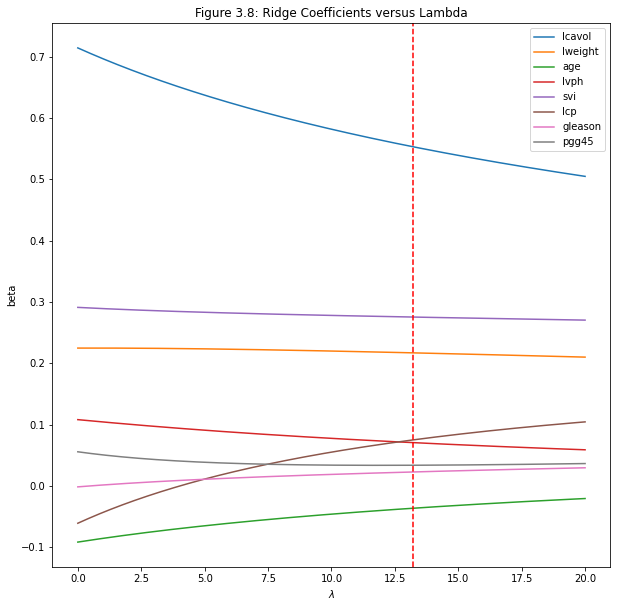

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257.50526665934234, tolerance: 0.062391830640198
  positive)


optimal alpha =  [0.92929293]
optimal lasso coefficient vector =  [0.03876194 0.         0.         0.         0.         0.
 0.         0.        ]
MSE =  0.6602098863639491
Baseline MSE = 0.6939762949801717


<Figure size 432x288 with 0 Axes>

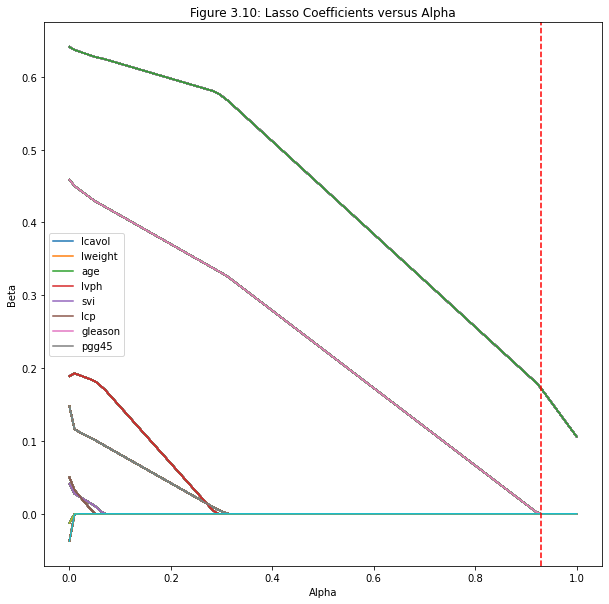

In [ ]:
prostate_features, prostate_labels = clean_data(prostate_data)
p_training_features, p_training_labels, p_testing_features, p_testing_labels, p_validation_features, p_validation_labels = separate_data(prostate_features, prostate_labels)
linear_regression(p_training_features, p_training_labels, p_testing_features, p_testing_labels, prostate_feature_names)
ridge_regression(p_training_features, p_training_labels, p_testing_features, p_testing_labels, p_validation_features, p_validation_labels, prostate_feature_names)
lasso_regression(p_training_features, p_training_labels, p_testing_features, p_testing_labels, p_validation_features, p_validation_labels, prostate_feature_names)




# **Stretch Goal: Feature Manipulation for Prostate Data**

MSE = 0.29320482154305194
Baseline MSE = 0.6939762949801717
Table 3.1: Correlation Matrix


,lcavol,lweight,age,lvph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.318315,0.005845,0.002627,0.557180,0.671782,-0.105679,0.467595
lweight,0.318315,1.000000,-0.081684,0.426458,0.147238,0.164723,-0.205266,0.141219
age,0.005845,-0.081684,1.000000,-0.162327,0.053335,0.010328,0.237354,-0.067601
lvph,0.002627,0.426458,-0.162327,1.000000,-0.113423,-0.044104,-0.214026,0.180044
svi,0.557180,0.147238,0.053335,-0.113423,1.000000,0.678453,0.009298,0.498377
lcp,0.671782,0.164723,0.010328,-0.044104,0.678453,1.000000,-0.036816,0.682397
gleason,-0.105679,-0.205266,0.237354,-0.214026,0.009298,-0.036816,1.000000,-0.039884
pgg45,0.467595,0.141219,-0.067601,0.180044,0.498377,0.682397,-0.039884,1.000000


Table 3.2


,Term,Coefficient,Std. Error,Z score
0,Intercept,2.528253,0.025591,98.794357
1,lcavol,0.688940,0.029687,23.207168
2,lweight,0.191224,0.024984,7.653748
3,age,0.036681,0.013641,2.688952
4,lvph,0.066433,0.025867,2.568228
5,svi,0.292844,0.028037,10.444854
6,lcp,-0.045739,0.037016,-1.235655
7,gleason,-0.149088,0.022921,-6.504294
8,pgg45,0.038432,0.030553,1.257886


optimal lambda =  [11.11111111]
optimal ridge coefficient vector =  [ 2.09478534  0.56320754  0.20957334  0.14036287  0.08096491  0.26554763
  0.06500286 -0.07563439  0.05193055]
MSE =  0.2870690249723629
Baseline MSE = 0.6939762949801717


<Figure size 432x288 with 0 Axes>

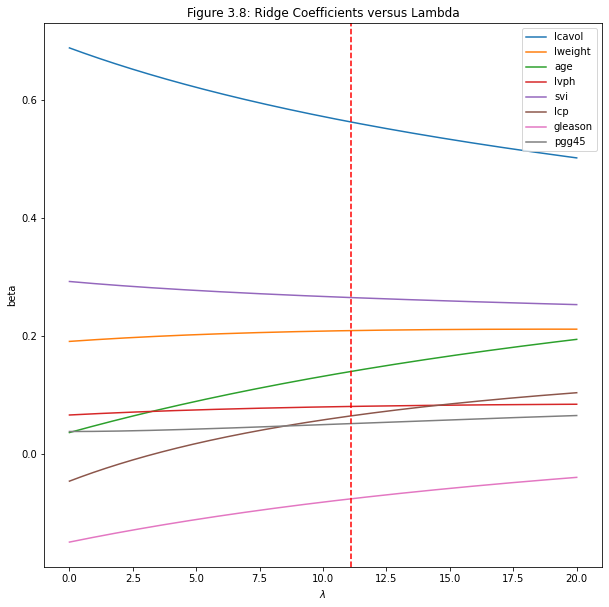

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.15561255167992, tolerance: 0.062391830640198
  positive)


optimal alpha =  [0.72727273]
optimal lasso coefficient vector =  [ 0.23047212  0.          0.          0.          0.          0.
 -0.          0.        ]
MSE =  0.5387167621777864
Baseline MSE = 0.6939762949801717


<Figure size 432x288 with 0 Axes>

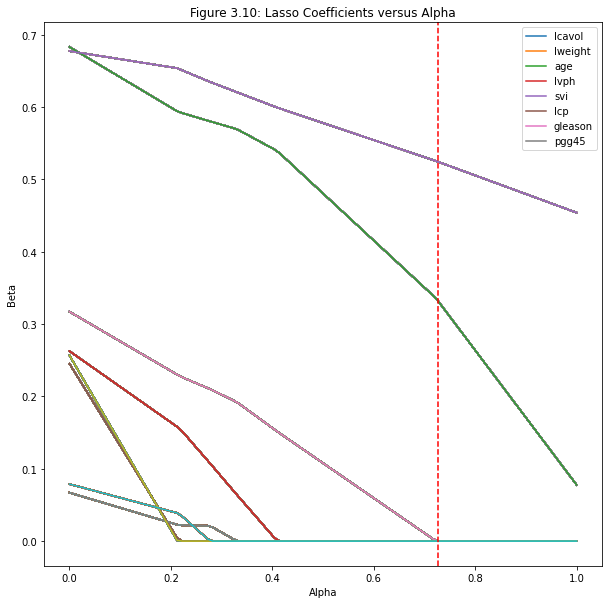

In [ ]:
### Stretch Goals

X1 = prostate_features[:, 1] # lcavol
X2 = prostate_features[:, 2] # lweight
X3 = prostate_features[:,3] # age
X3 = X3**2
X7 = X1*X2 # replacing gleason
prostate_features[:,3] = X3
prostate_features[:,7] = X7

p_training_features, p_training_labels, p_testing_features, p_testing_labels, p_validation_features, p_validation_labels = separate_data(prostate_features, prostate_labels)
linear_regression(p_training_features, p_training_labels, p_testing_features, p_testing_labels, prostate_feature_names)
ridge_regression(p_training_features, p_training_labels, p_testing_features, p_testing_labels, p_validation_features, p_validation_labels, prostate_feature_names)
lasso_regression(p_training_features, p_training_labels, p_testing_features, p_testing_labels, p_validation_features, p_validation_labels, prostate_feature_names)

# **Run Functions for Wine Quality Data**

MSE = 0.3790692317925741
Baseline MSE = 0.6025251798517933
Table 3.1: Correlation Matrix


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.255619,0.666664,0.122336,0.088610,-0.143382,-0.114711,0.663045,-0.671132,0.180215,-0.049083
volatile acidity,-0.255619,1.000000,-0.558701,-0.004766,0.056139,-0.055474,0.028357,0.018322,0.233364,-0.254624,-0.206233
citric acid,0.666664,-0.558701,1.000000,0.162561,0.210059,-0.042134,0.048767,0.375849,-0.532471,0.316353,0.108454
residual sugar,0.122336,-0.004766,0.162561,1.000000,0.043093,0.178289,0.203604,0.351166,-0.075752,0.013631,0.064470
chlorides,0.088610,0.056139,0.210059,0.043093,1.000000,-0.005948,0.043168,0.198938,-0.272314,0.387816,-0.221325
free sulfur dioxide,-0.143382,-0.055474,-0.042134,0.178289,-0.005948,1.000000,0.672411,-0.024812,0.058027,0.072057,-0.062132
total sulfur dioxide,-0.114711,0.028357,0.048767,0.203604,0.043168,0.672411,1.000000,0.065693,-0.064251,0.054857,-0.189712
density,0.663045,0.018322,0.375849,0.351166,0.198938,-0.024812,0.065693,1.000000,-0.327084,0.159495,-0.487389
pH,-0.671132,0.233364,-0.532471,-0.075752,-0.272314,0.058027,-0.064251,-0.327084,1.000000,-0.185533,0.202175
sulphates,0.180215,-0.254624,0.316353,0.013631,0.387816,0.072057,0.054857,0.159495,-0.185533,1.000000,0.092629


Table 3.2


,Term,Coefficient,Std. Error,Z score
0,Intercept,5.638195,0.006106,923.372435
1,fixed acidity,0.072557,0.016864,4.302483
2,volatile acidity,-0.192350,0.008248,-23.321138
3,citric acid,-0.050390,0.010737,-4.693146
4,residual sugar,0.046140,0.008379,5.506832
5,chlorides,-0.085945,0.007477,-11.495285
6,free sulfur dioxide,0.041100,0.008461,4.857522
7,total sulfur dioxide,-0.105547,0.008951,-11.792273
8,density,-0.061973,0.015321,-4.044843
9,pH,-0.053448,0.011127,-4.803666


optimal lambda =  [0.]
optimal ridge coefficient vector =  [ 5.6381949   0.07255712 -0.19234956 -0.05038996  0.04614002 -0.08594464
  0.04109973 -0.105547   -0.06197269 -0.05344835  0.16830237  0.27057877]
MSE =  0.3790692317925741
Baseline MSE = 0.6025251798517933


<Figure size 432x288 with 0 Axes>

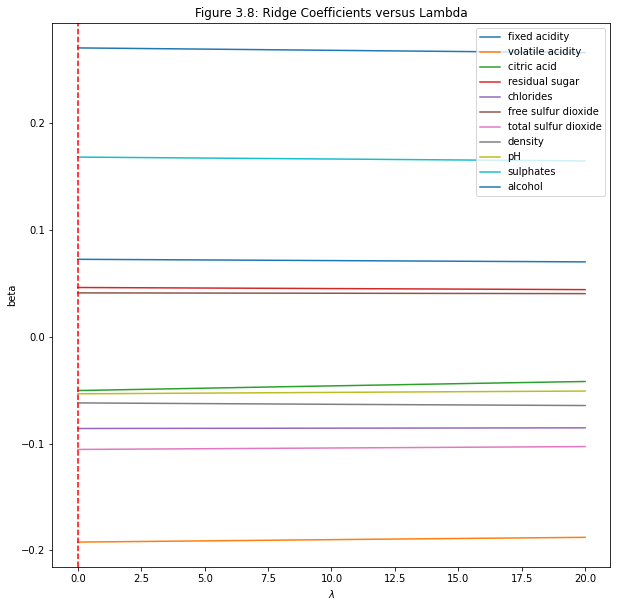

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20562.619266070447, tolerance: 4.1441
  positive)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected result

optimal alpha =  [0.]
optimal lasso coefficient vector =  [ 0.07255732 -0.19234956 -0.05038997  0.04614008 -0.08594461  0.04109971
 -0.10554697 -0.06197285 -0.05344824  0.16830238  0.27057868]
MSE =  0.37906924961576743
Baseline MSE = 0.6025251798517933


<Figure size 432x288 with 0 Axes>

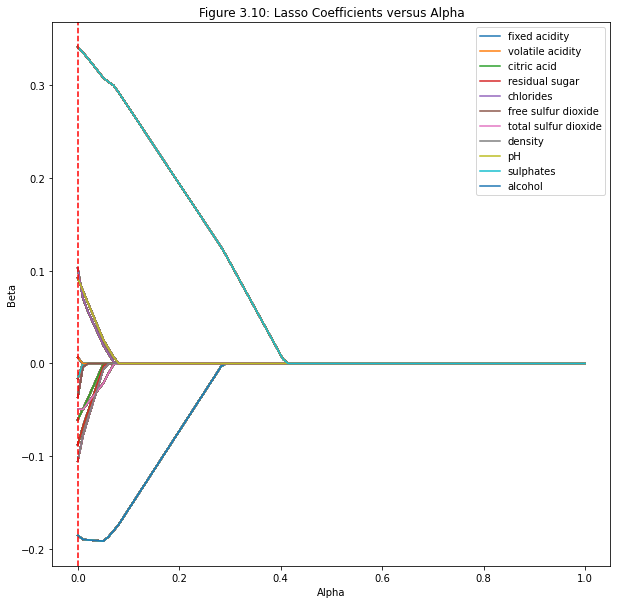

In [ ]:
wine_features, wine_labels = clean_data(wine_data)
w_training_features, w_training_labels, w_testing_features, w_testing_labels, w_validation_features, w_validation_labels = separate_data(wine_features, wine_labels)
linear_regression(w_training_features, w_training_labels, w_testing_features, w_testing_labels, wine_feature_names)
ridge_regression(w_training_features, w_training_labels, w_testing_features, w_testing_labels, w_validation_features, w_validation_labels, wine_feature_names)
lasso_regression(w_training_features, w_training_labels, w_testing_features, w_testing_labels, w_validation_features, w_validation_labels, wine_feature_names)


# **Stretch Goal: Feature Manipulation for Wine Quality Data**

MSE = 0.3602767292381327
Baseline MSE = 0.6025251798517933
Table 3.1: Correlation Matrix


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.140464,0.330643,0.100411,-0.060707,-0.445597,-0.042350,0.300971,-0.199770,0.105225,0.167751
volatile acidity,-0.140464,1.000000,-0.558701,-0.004766,0.056139,0.452309,-0.039077,0.018322,0.233364,-0.254624,-0.206233
citric acid,0.330643,-0.558701,1.000000,0.162561,0.210059,-0.317841,0.090515,0.375849,-0.532471,0.316353,0.108454
residual sugar,0.100411,-0.004766,0.162561,1.000000,0.043093,-0.031067,0.211150,0.351166,-0.075752,0.013631,0.064470
chlorides,-0.060707,0.056139,0.210059,0.043093,1.000000,0.023792,-0.024235,0.198938,-0.272314,0.387816,-0.221325
free sulfur dioxide,-0.445597,0.452309,-0.317841,-0.031067,0.023792,1.000000,0.009708,-0.170975,0.247648,-0.145052,-0.013835
total sulfur dioxide,-0.042350,-0.039077,0.090515,0.211150,-0.024235,0.009708,1.000000,-0.059699,-0.103318,-0.013842,0.025969
density,0.300971,0.018322,0.375849,0.351166,0.198938,-0.170975,-0.059699,1.000000,-0.327084,0.159495,-0.487389
pH,-0.199770,0.233364,-0.532471,-0.075752,-0.272314,0.247648,-0.103318,-0.327084,1.000000,-0.185533,0.202175
sulphates,0.105225,-0.254624,0.316353,0.013631,0.387816,-0.145052,-0.013842,0.159495,-0.185533,1.000000,0.092629


Table 3.2


,Term,Coefficient,Std. Error,Z score
0,Intercept,5.648316,0.007189,785.687052
1,fixed acidity,-0.013311,0.004371,-3.045054
2,volatile acidity,-0.199092,0.008641,-23.040056
3,citric acid,-0.055848,0.009871,-5.657831
4,residual sugar,0.006277,0.007424,0.845450
5,chlorides,-0.087667,0.007108,-12.333608
6,free sulfur dioxide,-0.007855,0.003975,-1.975744
7,total sulfur dioxide,-0.000324,0.000406,-0.799037
8,density,0.022452,0.009966,2.252807
9,pH,-0.087868,0.007660,-11.470326


optimal lambda =  [0.]
optimal ridge coefficient vector =  [ 5.64831609e+00 -1.33114395e-02 -1.99092158e-01 -5.58477725e-02
  6.27684984e-03 -8.76668255e-02 -7.85452854e-03 -3.24467503e-04
  2.24522432e-02 -8.78680400e-02  1.53752081e-01  3.38577878e-01]
MSE =  0.3602767292381327
Baseline MSE = 0.6025251798517933


<Figure size 432x288 with 0 Axes>

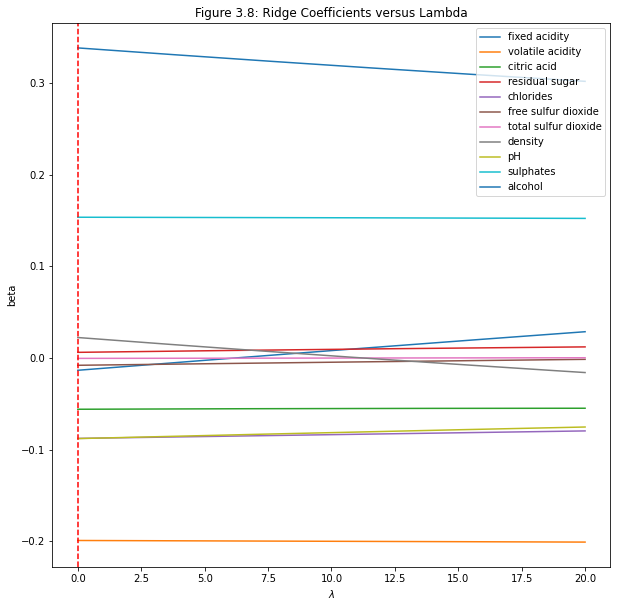

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14237.53380142985, tolerance: 4.1441
  positive)


optimal alpha =  [0.24242424]
optimal lasso coefficient vector =  [ 0.         -0.03274745  0.          0.         -0.         -0.
  0.         -0.         -0.          0.          0.12639894]
MSE =  0.5039745891998598
Baseline MSE = 0.6025251798517933


<Figure size 432x288 with 0 Axes>

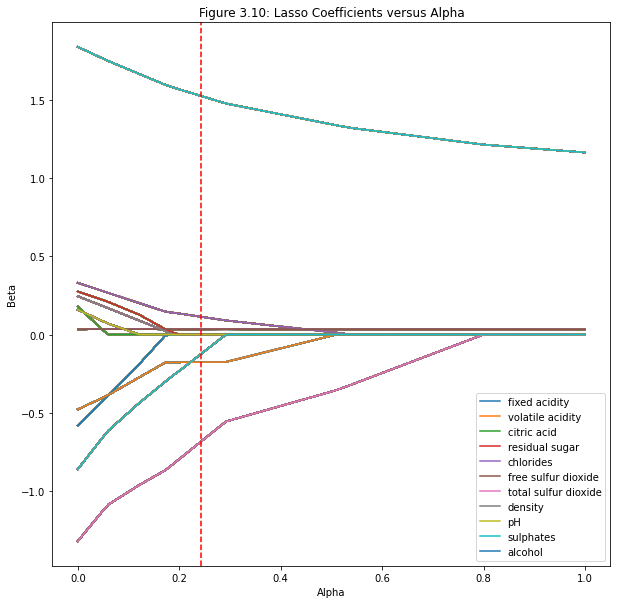

In [ ]:
# Stretch Goal
X1 = wine_features[:,1] # fixed acidity
X2 = wine_features[:,2] # volatile acidity
X7 = wine_features[:,7] # total sulfur dioxide
X1 = X1**2
X6 = X1*X2 
X7 = X7**3
wine_features[:,1] = X1
wine_features[:,6] = X6 # replace free sulfur dioxide
wine_features[:,7] = X7


w_training_features, w_training_labels, w_testing_features, w_testing_labels, w_validation_features, w_validation_labels = separate_data(wine_features, wine_labels)
linear_regression(w_training_features, w_training_labels, w_testing_features, w_testing_labels, wine_feature_names)
ridge_regression(w_training_features, w_training_labels, w_testing_features, w_testing_labels, w_validation_features, w_validation_labels, wine_feature_names)
lasso_regression(w_training_features, w_training_labels, w_testing_features, w_testing_labels, w_validation_features, w_validation_labels, wine_feature_names)
